<a href="https://colab.research.google.com/github/kurtgrothe/ANA675_Project/blob/main/ANA675_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Boston Housing Prices

Team Members:  
Kurt Grothe  
Kamika Hughes  
Daniel Lagos  

This project is a to predict the best price of a home in Boston for negotiating purposes

### Library Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from keras.utils import np_utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
#from IPython.display import Image
#import tensorflow as tf

### Data Load/Split Data into Testing and Training

In [ ]:
# Import Data and Split into Testing and Training
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(seed=42)

57026/57026 [==============================] - 0s 0us/step


### Data Exploration

In [ ]:
print("Data Shapes:")
print(f"x_train:{x_train.shape}, y_train:{y_train.shape}\nx_test:{x_test.shape},  y_test:{y_test.shape}")
print()
print("Data Types:")
print(f"x_train:{type(x_train)}, y_train:{type(y_train)}\nx_test:{type(x_test)},  y_test:{type(y_test)}")

Data Shapes:
x_train:(404, 13), y_train:(404,)
x_test:(102, 13),  y_test:(102,)

Data Types:
x_train:<class 'numpy.ndarray'>, y_train:<class 'numpy.ndarray'>
x_test:<class 'numpy.ndarray'>,  y_test:<class 'numpy.ndarray'>


**Variables**  
 Crime:      per capita crime rate by town  
 Zone:       proportion of residential land zoned for lots over 25,000 sq.ft.  
 Indus:      proportion of non-retail business acres per town  
 River:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
 Nox:        nitric oxides concentration (parts per 10 million)  
 Room_num:   average number of rooms per dwelling  
 Owner:      proportion of owner-occupied units built prior to 1940  
 Distance:   weighted distances to five Boston employment centres  
 Highway:    index of accessibility to radial highways  
 Tax:        full-value property-tax rate per \\$10,000  
 Teacher:    pupil-teacher ratio by town  
 Lstat:      % lower status of the population  
 medv:       Median value of owner-occupied homes in $1000's

In [ ]:
# Create Labels
labels = ['Crime','Zone','Indus','River','Nox','Room_num','Owner','Distance','Highway','Tax','Teacher','Lstat','Medv']
# Create Dataframe from train
df = pd.DataFrame(x_train, columns=labels)
df['Price'] = y_train[0]
# Create Dataframe from test
dfa = pd.DataFrame(x_test, columns=labels)
dfa['Price'] = y_test[0]
# Merge test to train df
df = df.append(dfa)
df

,Crime,Zone,Indus,River,Nox,Room_num,Owner,Distance,Highway,Tax,Teacher,Lstat,Medv,Price
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,23.6
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,23.6
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,23.6
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66,22.4
98,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00,22.4
99,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99,22.4
100,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27,22.4


In [ ]:
# Summary stats
df.describe()

,Crime,Zone,Indus,River,Nox,Room_num,Owner,Distance,Highway,Tax,Teacher,Lstat,Medv,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,23.358103
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,0.481893
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,22.400000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,23.600000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,23.600000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,23.600000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,23.600000


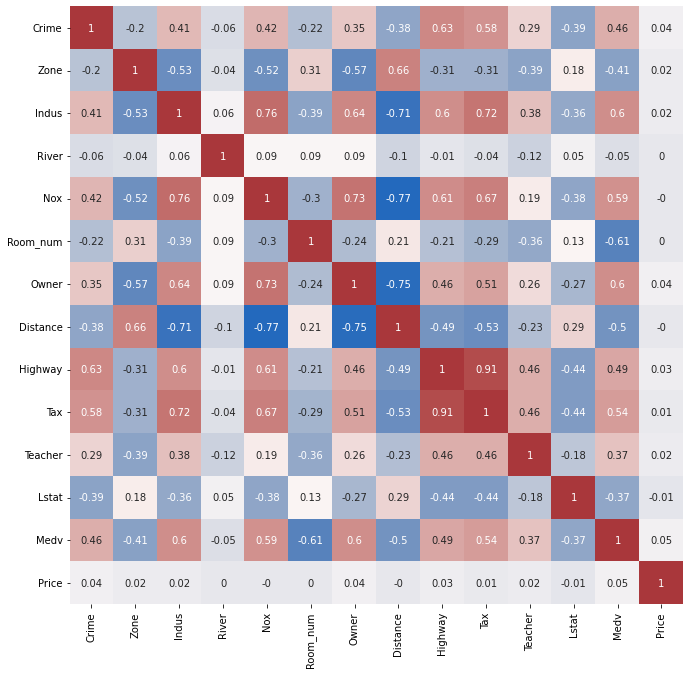

In [ ]:
# Correlatoin Matrix
matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(matrix, annot=True,cbar=False,cmap='vlag')
plt.show()

### Normalize data

In [ ]:
scaler = MinMaxScaler()
# Scale images to the [0, 1] range
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Check that Data was scaled properly with Min at 0 and Max at 1
print(pd.DataFrame(x_train_scaled).min(),pd.DataFrame(x_train_scaled).max())

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
dtype: float64


### Neural Network

In [ ]:
# Function to keep track of models and parameters
def model_compare(annlayers,history_models):
    single_model= pd.DataFrame()
    inc_a,inc_b = 0,1    
    for i,layer in zip(range(len(annlayers)),annlayers):
        single_model.loc[0,i+inc_a] = layer.output_shape[1]
        single_model.loc[0,i+inc_b] = layer.activation     
        inc_a += 1 
        inc_b += 1
            
    # Run predictions for comparison    
    predictions = ann.predict(x_test,verbose=False)
    # Calculate and Append MSE to location 0
    single_model.loc[0,0] = np.sqrt(mean_squared_error(y_test,predictions))
    # Append loss function to location 1
    single_model.loc[0,1] = ann.history.model.loss
    # Append to Single Model to History
    history_models = history_models.append(single_model,ignore_index=True)
    return history_models

In [ ]:
batch_size = 32
epochs = 150
input_shape = 13

# Call Backs
early_stopping = EarlyStopping(monitor='val_loss', 
                               patience=3, 
                               verbose=1, 
                               restore_best_weights=True)
checkpoint = ModelCheckpoint("/Users/imac/Desktop/ANA675/", save_format="h5",
                             monitor='val_loss', 
                             mode='min',
                             save_best_only=True, 
                             verbose=1)
learning_rate = ReduceLROnPlateau(monitor='val_loss',
                            factor=0.2,
                            patience=3,
                            verbose=1,)
callbacks = [checkpoint,early_stopping,learning_rate]
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-09,amsgrad=False,)


In [ ]:
ann = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(150, activation="relu"),
        keras.layers.Dense(300, activation="relu"),        
        keras.layers.Dense(600, activation="relu"),        
        layers.Dense(1)
    ]
)
ann.summary()
ann.compile(loss="mse", optimizer=opt)

history_models = model_compare(ann.layers, history_models)
#history_models.to_excel("../../Desktop/history.xlsx") # change your path to view excel

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 100)               1400      
                                                                 
 dense_51 (Dense)            (None, 150)               15150     
                                                                 
 dense_52 (Dense)            (None, 300)               45300     
                                                                 
 dense_53 (Dense)            (None, 600)               180600    
                                                                 
 dense_54 (Dense)            (None, 1)                 601       
                                                                 
Total params: 243,051
Trainable params: 243,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = ann.fit(x_train, y_train, batch_size=batch_size, 
                  epochs=epochs, validation_split=0.1,
                  callbacks=callbacks)

Epoch 1/150
 1/12 [=>............................] - ETA: 4s - loss: 402.8843
Epoch 1: val_loss improved from inf to 82.35939, saving model to /Users/imac/Desktop/ANA675/
INFO:tensorflow:Assets written to: /Users/imac/Desktop/ANA675/assets
12/12 [==============================] - 1s 81ms/step - loss: 185.5012 - val_loss: 82.3594 - lr: 1.0000e-04
Epoch 2/150
 1/12 [=>............................] - ETA: 0s - loss: 75.0752
Epoch 2: val_loss improved from 82.35939 to 78.14849, saving model to /Users/imac/Desktop/ANA675/
INFO:tensorflow:Assets written to: /Users/imac/Desktop/ANA675/assets
12/12 [==============================] - 1s 74ms/step - loss: 84.1935 - val_loss: 78.1485 - lr: 1.0000e-04
Epoch 3/150
 1/12 [=>............................] - ETA: 0s - loss: 65.7205
Epoch 3: val_loss improved from 78.14849 to 73.57870, saving model to /Users/imac/Desktop/ANA675/
INFO:tensorflow:Assets written to: /Users/imac/Desktop/ANA675/assets
12/12 [==============================] - 1s 73ms/step - l

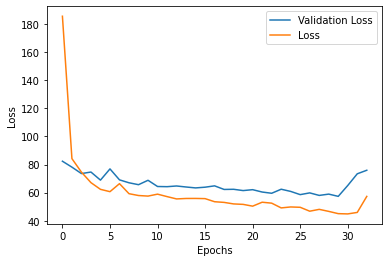

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
x = np.arange(0,len(history.epoch))
plt.plot( x,val_loss,label='Validation Loss')
plt.plot( x,loss, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
predictions = ann.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

7.130042018444781

In [ ]:
results = pd.DataFrame(y_test,columns=['Test'])
results['Predictions'] = pd.DataFrame(predictions)
results['Error'] = abs(results['Predictions']-results['Test'])
results['Error_pctg'] = results['Error']/results['Test']
results.describe()

,Test,Predictions,Error,Error_pctg
count,102.000000,102.000000,102.000000,102.000000
mean,22.640196,22.893684,4.812560,0.227358
std,8.479798,5.195599,5.286851,0.248334
min,7.200000,11.042565,0.100097,0.004036
25%,18.925000,19.320990,1.840109,0.087656
50%,21.400000,23.987906,3.388007,0.141625
75%,24.650000,26.492663,6.483504,0.271693
max,50.000000,35.218578,30.622368,1.512444


In [ ]:
explained_variance_score(y_test,predictions)

0.2869127922958232

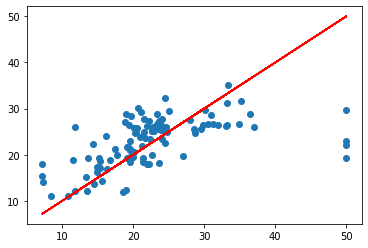

In [ ]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
# predict 

# Start of SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel= 'rbf')
regressor.fit(x_train, y_train)

SVR()

Predict Model

In [ ]:
predictions_svr = regressor.predict(x_test)
predictions_svr.shape

(102,)

Model Score

In [ ]:
regressor.score(x_test, y_test)

0.08746060282552581

Visualize Results

Text(0, 0.5, 'predictions_svr')

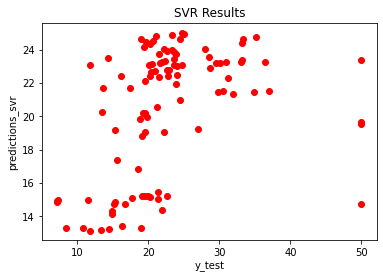

In [ ]:
plt.scatter(y_test, predictions_svr, color = 'red')
#plt.plot(predictions, y_test, color = 'blue')
plt.title('SVR Results')
plt.xlabel('y_test')
plt.ylabel('predictions_svr')

# Tuning Process
First identify current parameters, then systematically change them to improve model

In [ ]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Parameters to change during tuning

Kernel:  linear, poly, sigmoid

epsilon: .15, 0.2, 0.25 

C:  2.0, 3.0, 5.0, 6.0, 7.5, 10.0, 15.0

degree:  14

# Kernal Tuning

Results:  kernel = 'linear'

In [ ]:
regressor_kern = SVR(kernel= 'linear')
regressor_kern.fit(x_train, y_train)

SVR(kernel='linear')

Model Score

In [ ]:
regressor_kern.score(x_test, y_test)

0.6763595229603985

**increased to 67.63595229603985%, keep this change.  All other options were well below this score.**

Results:  kernel = 'poly'

In [ ]:
regressor_kern = SVR(kernel= 'poly')
regressor_kern.fit(x_train, y_train)

SVR(kernel='poly')

Model Score

In [ ]:
regressor_kern.score(x_test, y_test)

0.13614902792661177

score decreased to 13.614902792661177%

Results:  kernel = 'sigmoid'

In [ ]:
regressor_kern = SVR(kernel= 'sigmoid')
regressor_kern.fit(x_train, y_train)

SVR(kernel='sigmoid')

Model Score

In [ ]:
regressor_kern.score(x_test, y_test)

-0.00339619883644926

Score decreased to -00.339619883644926%

Kernal Tuning Results

linear:  67.63595229603985%

ploy:  13.614902792661177%

sigmoid:  -00.339619883644926%

**Keep linear tuning in model**

# Epsilon Tuning

## Epsilon 0.15

In [ ]:
regressor_epsilon = SVR(kernel= 'linear', epsilon = 0.15)
regressor_epsilon.fit(x_train, y_train)

SVR(epsilon=0.15, kernel='linear')

Model Score

In [ ]:
regressor_epsilon.score(x_test, y_test)

0.676378815967517

score changed to 67.6378815967517%

## Epsilon 0.2

In [ ]:
regressor_epsilon = SVR(kernel= 'linear', epsilon = 0.2)
regressor_epsilon.fit(x_train, y_train)

SVR(epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_epsilon.score(x_test, y_test)

0.6745601128234539

Score changed to 67.45601128234539%

## Epsilon 0.25

In [ ]:
regressor_epsilon = SVR(kernel= 'linear', epsilon = 0.25)
regressor_epsilon.fit(x_train, y_train)

SVR(epsilon=0.25, kernel='linear')

Model Score

In [ ]:
regressor_epsilon.score(x_test, y_test)

0.6744715616642741

score changed to 67.44715616642741%

Epsilon Tuning Results

Epsilon = 0.15:  67.6378815967517%

Epsilon = 0.2:  67.45601128234539%

Epsilon = 0.25:  67.44715616642741%

**Keep Epsilon = 0.2 in model**

# C Tuning

## Results for C = 2.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=2)
regressor_C.fit(x_train, y_train)

SVR(C=2, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.6786340178439385

score changed to 67.86340178439385%

## Results for C = 3.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=3)
regressor_C.fit(x_train, y_train)

SVR(C=3, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.6814457272821559

Score changed to 68.14457272821559%

## Results for C = 5.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=5)
regressor_C.fit(x_train, y_train)

SVR(C=5, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.6879443123442981

Score changed to 68.79443123442981%

## Results for C = 6.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=6)
regressor_C.fit(x_train, y_train)

SVR(C=6, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.68810987505182

score changed to 68.810987505182%

## Results for C = 7.5

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=7.5)
regressor_C.fit(x_train, y_train)

SVR(C=7.5, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.6787340820537053

Score changed to 67.87340820537053%

## Results for C = 10.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=10.0)
regressor_C.fit(x_train, y_train)

SVR(C=10.0, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.670188913331756

score changed to 67.0188913331756%

## Results for C = 15.0

In [ ]:
regressor_C = SVR(kernel= 'linear', epsilon = 0.2, C=15.0)
regressor_C.fit(x_train, y_train)

SVR(C=15.0, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_C.score(x_test, y_test)

0.6678169311378781

score changed to 66.78169311378781%

## C values and accuracy scores

C=2:  0.6786340178439385

C=3:  0.6814457272821559

C=5:  0.6879443123442981

C=6:  0.68810987505182

C=7.5:  0.6787340820537053

C=10:  0.670188913331756

c=15:  0.6678169311378781

**C=6 seems to be the best setting with accuracy score of 68.81%.  Keep C=6.0**

# Degree Tuning

Given that there are 13 variables, we change degree value to 14 and look for imporovements to score


In [ ]:
regressor_degree = SVR(kernel= 'linear', epsilon = 0.2, C=6, degree=14)
regressor_degree.fit(x_train, y_train)

SVR(C=6, degree=14, epsilon=0.2, kernel='linear')

Model Score

In [ ]:
regressor_degree.score(x_test, y_test)

0.68810987505182

as expected score did not change:  68.810987505182%

 Conclude that no change to degree is required.

In [ ]:
regressor_final = SVR(kernel= 'linear', epsilon = 0.2, C=6)
regressor_final.fit(x_train, y_train)
regressor_final.score(x_test, y_test)

0.68810987505182

# Conclusions to model parameters

new model to be the following:

SVR(kernel= 'linear', epsilon = 0.2, C=6)

With score of approx.  68.81099%